In [1]:
from copy import deepcopy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from collections import defaultdict

with open('train.dat','r') as f1:
    data = []
    for line in f1:
        data.append(line)
        
ptr = [0]
ind = []
val = []

In [3]:
len(data)

8580

In [4]:
temp = []
i = 0
j = 0
for doc in data:
    for d in doc.split():
        if j%2 == 0:
            ind.append(d)
        else:
            val.append(d)
        j += 1
    ptr.append(int(ptr[i] + len(doc.split())/2))
    temp.append(doc.split())
    i += 1

In [6]:
max(ind)

'99996'

In [7]:
len(list(set(ind)))

27673

In [8]:
ind_unique_list = list(set(ind))

In [9]:
idx = {}
tid = 0
for i in ind_unique_list:
    if i not in idx:
        idx[int(i)] = tid
        tid += 1
# print(idx)
# for key in idx:
#     if int(key) > 100000:
#         print("\\ ",key,":", idx[key], "\\")
nind = []
for j in ind:
    temp = idx[int(j)]
#     print(j,":",temp)
    nind.append(temp)
# for i in range(0,10):
#     print(ind[i], ":", nind[i])

In [10]:
print(max(nind))

27672


In [11]:
len(ind)

1107980

In [4]:
len(ptr)

In [13]:
print("ptr", len(ptr))
print("ind", len(ind))
print("val", len(val))

ptr 8581
ind 1107980
val 1107980


In [14]:
nrows = len(data)
ncols = len(set(ind))
print("nrows", nrows)
print("ncols", ncols)

nrows 8580
ncols 27673


In [15]:
# val = [float(i) for i in val]
# ind = [float(i) for i in ind]
# ptr = [float(i) for i in ptr]

In [16]:
mat = csr_matrix((val,nind,ptr), dtype=np.float32)

In [17]:
mat.shape

(8580, 27673)

In [18]:
mat.sort_indices()

[ 28.54665375  23.88935089  18.73949623  13.05046272  10.47562695
   9.74541283   8.54499722   8.15892506   7.38706493   7.00987387
   5.75184011   5.39787865   5.0911231    4.73107815   4.25241518
   4.07760715   3.95115185   3.68479419   3.46208763   3.34218669
   3.29928827   3.10895872   2.97940183   2.8574729    2.83005619
   2.6961534    2.60226083   2.52415967   2.50381279   2.40452075]


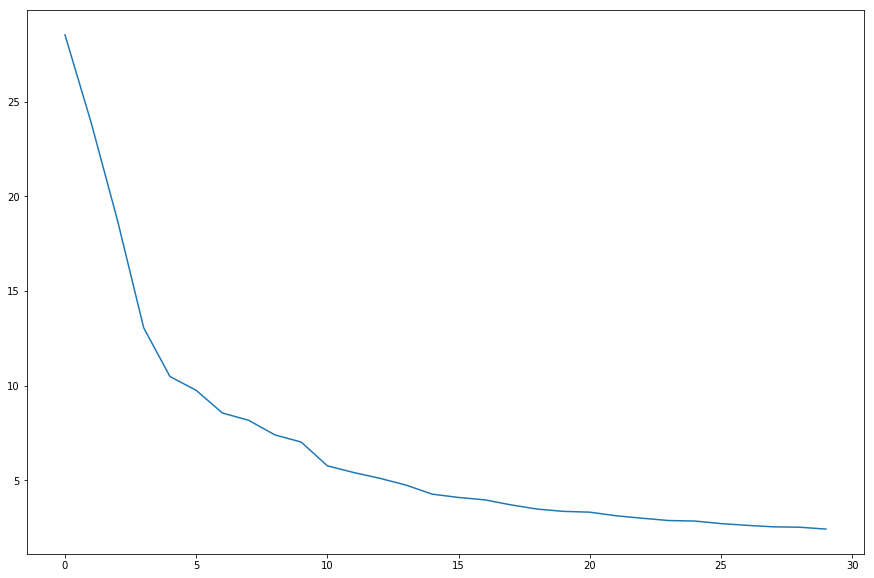

In [36]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=30, n_iter=10, random_state=42)
reduced_mat = svd.fit_transform(mat)

type(reduced_mat)

comps = svd.explained_variance_
print(comps)

import matplotlib.pyplot as plt
plt.plot(comps)
plt.show()

# copy_reduced = reduced_mat[...,1:]

# copy_reduced.shape

In [21]:
type(comps)

numpy.ndarray

In [22]:
from scipy.spatial.distance import pdist, squareform

distance_matrix = pdist(reduced_mat, 'euclidean')
dm = squareform(distance_matrix)
# print(dm)
print(dm.shape)
tmp_dm = dm.copy()

(8580, 8580)


In [23]:
tmp_dm

array([[ 0.        ,  4.28023048,  5.09797531, ...,  5.5720757 ,
         5.10596562,  4.51084545],
       [ 4.28023048,  0.        ,  5.96606743, ...,  3.51353062,
         3.13488224,  4.97994855],
       [ 5.09797531,  5.96606743,  0.        , ...,  8.28875017,
         7.85645754,  8.83708655],
       ..., 
       [ 5.5720757 ,  3.51353062,  8.28875017, ...,  0.        ,
         1.41758409,  4.0231601 ],
       [ 5.10596562,  3.13488224,  7.85645754, ...,  1.41758409,
         0.        ,  3.61565685],
       [ 4.51084545,  4.97994855,  8.83708655, ...,  4.0231601 ,
         3.61565685,  0.        ]])

In [5]:
# Try normalization
# c = 0
# for row in tmp_dm:
#     print("Dp -", c)
#     for dp in row:
#         print(dp)
#     c += 1
#     print("\n\n")

In [25]:
# from sklearn import preprocessing
# dm = preprocessing.normalize(dm, norm='l2')

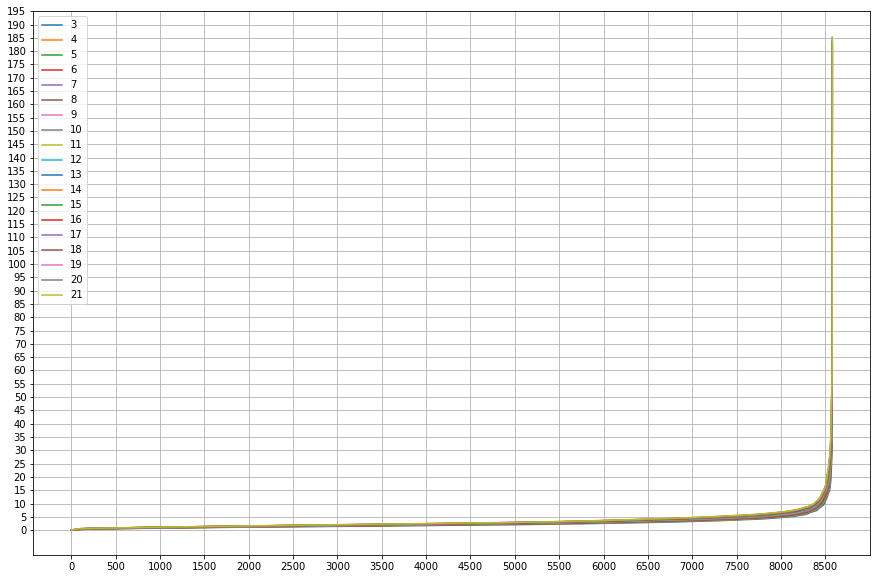

In [35]:
for row in dm:
    row.sort()
    
fig = plt.figure()
plt.rcParams["figure.figsize"] = [15,10]

tdm = []

for i in range(3, 22):
    r = sorted([row[i] for row in dm])
    tdm.append(r)
    plt.plot(r)
    
plt.legend([str(i) for i in range(3,23)])

ax = fig.gca()
ax.set_yticks(np.arange(0, 200, 5))
ax.set_xticks(np.arange(0, 9000, 500))

plt.grid(True)
plt.show()

In [27]:
tmp_dm

array([[ 0.        ,  4.28023048,  5.09797531, ...,  5.5720757 ,
         5.10596562,  4.51084545],
       [ 4.28023048,  0.        ,  5.96606743, ...,  3.51353062,
         3.13488224,  4.97994855],
       [ 5.09797531,  5.96606743,  0.        , ...,  8.28875017,
         7.85645754,  8.83708655],
       ..., 
       [ 5.5720757 ,  3.51353062,  8.28875017, ...,  0.        ,
         1.41758409,  4.0231601 ],
       [ 5.10596562,  3.13488224,  7.85645754, ...,  1.41758409,
         0.        ,  3.61565685],
       [ 4.51084545,  4.97994855,  8.83708655, ...,  4.0231601 ,
         3.61565685,  0.        ]])

In [36]:
c = 0 
core_points = []
for row in dm:
    if row[12] <= 3.5:
        core_points.append(c)
    else:
        pass
    c += 1

In [37]:
len(core_points)

6251

In [39]:
clusters_dict = {}
n = len(dm)
points_added = [False for i in range(0,n)]

In [3]:
len(core_points)

In [ ]:
t = 1
n = len(tmp_dm)
for row in tmp_dm:
#     print("0. Exploring for -", t-1)
    if t-1 in core_points:
        visited = points_added[t-1]
#         print("1. Point visited at row level - visited status-",visited)
        if visited == False:
            c = t
            tmp = []
#             print("\t1.1.1. Explore from",t,"to",n,"for",t-1)
            for d in range(c,n):
                temp = row[d]
                visited = points_added[d]
                con = d in core_points
                if temp<=2.5 and con and visited == False:
#                     print("\t\t1.1.2. For",t-1,"visited status -",visited,"- Point row[",d,"] - ", temp,"is inside epsilon - 3.7")
                    tmp.append(d)
                    points_added[d] = True 
#                     print("\t\t1.1.3. Added point",d,"with visited status -",points_added[d]," to cluster list for point-",t-1)
#                     print("\t\t1.1.4. Total cluster list till now -",tmp)
                else:
                    pass
            tmp.append(t-1)
            key = "cluster"+str(t-1)
            clusters_dict[key] =tmp
#             print("\t1.1.5.",key,"cluster added with core points-",tmp)       
        else:
            for key in clusters_dict:
                if t-1 in clusters_dict[key]:
#                     print("\t1.2.1. Finding points inside epsilon for already visited cluster")
                    c = t-1
                    tmp = []
                    for d in range(c,n):
                        temp = row[d]
                        visited = points_added[d]
                        con = d in core_points
                        if temp<=3.7 and con and visited == False:
#                             print("\t\t1.2.2. For",t-1,"visited status -",visited,"- Point row[",d,"] - ", temp,"is inside epsilon - 3.7")
                            tmp.append(d)
                            points_added[d] = True
#                             print("\t\t1.2.3. Added point",d,"with visited status -",points_added[d]," to cluster list for point-",t-1)
#                             print("\t\t1.2.4. Total cluster list till now -",tmp)
                        else:
                            pass
                    if len(tmp) != 0:
                        tmp_old = clusters_dict[key]
#                         print("\t1.2.5. Extended cluster -",key," with current core points -",tmp_old)
                        tmp_old.extend(tmp)
#                         print("\t to cluster with core points -",tmp_old)
                        clusters_dict[key] = tmp_old
    t += 1    
#     print("**************************************************************************************************************")
#     print("--------------------------------------------------------------------------------------------------------------\n\n")

In [ ]:
# next_core_point = find_next_unvisited_core_point(current_core_point,points_added,core_points)
    
# def find_next_unvisited_core_point(current_point,points_added,core_points):
#     next_core_point = binary_search(core_points)+1
#     visited = points_added[next_core_point]
#     if visited == False:
#         return next_core_point
#     else:
#         find_next_unvisited_core_point(next_core_point,points_added,core_points)

In [1]:
# cluster_dictionary = {}
# c = 0
# for cp in core_points:
#     visited = points_added[cp] 
#     if visited == False:
#         cluster_points = find_connected_core_points(list(),points_added,cp,3.5)
#         cluster_dictionary[c] = cluster_points
#         c += 1
#     else:
#         pass

In [44]:
# def find_connected_core_points(connected_core_points,points_added,current_core_point,eps):
#     print(type(current_core_point))
#     points_to_explore = tmp_dm[current_core_point]
#     count = current_core_point+1
#     connected_core_points.append(current_core_point)
#     for point in points_to_explore[current_core_point+1:]:
#         if count in core_points:
#             visited = points_added[count]
#             if point<=eps and visited == False:
#                 connected_core_points.append(count)
#                 points_added[count] = True
#                 connected_core_points.extend(find_connected_core_points(connected_core_points,points_added,count,eps))
#     return connected_core_points

In [41]:
len(clusters_dict)

10

In [55]:
total = 0
for key in clusters_dict:
    print("key -",key," & data points -",len(clusters_dict[key]))
    total += len(clusters_dict[key])

print("Total -", total)

key - cluster0  & data points - 745
key - cluster1  & data points - 442
key - cluster7  & data points - 2835
key - cluster11  & data points - 276
key - cluster57  & data points - 100
key - cluster129  & data points - 78
key - cluster3417  & data points - 171
key - cluster3422  & data points - 26
key - cluster3460  & data points - 28
key - cluster7174  & data points - 36
Total - 4737


In [45]:
tmp2 = deepcopy(tmp_clusters_dict)
tmp3 = deepcopy(tmp_clusters_dict)

In [54]:
clusters_dict = deepcopy(tmp2)

In [58]:
tmp_clusters_dict = clusters_dict
tmp_points_added = points_added
total = 0
for key in tmp_clusters_dict:
    print("key -",key," & data points -",len(tmp_clusters_dict[key]))
    total += len(tmp_clusters_dict[key])

print("Total -", total)

key - cluster0  & data points - 745
key - cluster1  & data points - 442
key - cluster7  & data points - 2835
key - cluster11  & data points - 276
key - cluster57  & data points - 100
key - cluster129  & data points - 78
key - cluster3417  & data points - 171
key - cluster3422  & data points - 26
key - cluster3460  & data points - 28
key - cluster7174  & data points - 36
Total - 4737


In [59]:
# len(clusters_dict['cluster0'])

In [60]:
nv = 0
c = 0
for row in tmp_dm:
    if points_added[c] == False:
        for d in range(0,n):
            if d != c:
                dis = row[d]
                if points_added[d] == True and dis <= 3.7:
                    for key in clusters_dict:
                        cls_list = clusters_dict[key]
#                         print(type(clusters_dict[key]))
                        cond = d in clusters_dict[key]
                        if cond:
                            cls_list.append(c)
                            clusters_dict[key] = cls_list
                            nv += 1
                            points_added[c] = True
                        break
                    break
    c += 1

In [61]:
total = 0
for key in clusters_dict:
    print("key -",key," & data points -",len(set(clusters_dict[key])))
    total += len(set(clusters_dict[key]))

print("Total -", total)

key - cluster0  & data points - 745
key - cluster1  & data points - 442
key - cluster7  & data points - 2835
key - cluster11  & data points - 276
key - cluster57  & data points - 100
key - cluster129  & data points - 78
key - cluster3417  & data points - 171
key - cluster3422  & data points - 26
key - cluster3460  & data points - 28
key - cluster7174  & data points - 36
Total - 4737


In [111]:
type((clusters_dict['cluster0'])[0])

int

In [119]:
# for key in clusters_dict:
# #     print(key)
#     for d in clusters_dict[key]:
# #         print(type(d))
#         points_added[d] = True

In [51]:
c = 0
for pa in points_added:
    if pa == False:
        c += 1
# print(total+nv)
print(c)

2684


In [52]:
nv = 0
c = 0
for row in tmp_dm:
    if points_added[c] == False:
        for d in range(0,n):
            if d != c:
                dis = row[d]
                if points_added[d] == True:
                    for key in clusters_dict:
                        cls_list = clusters_dict[key]
#                         print(type(clusters_dict[key]))
                        cond = d in clusters_dict[key]
                        if cond:
                            cls_list.append(c)
                            clusters_dict[key] = cls_list
                            nv += 1
                        break
                    break
    c += 1

In [53]:
total = 0
for key in clusters_dict:
    print("key -",key," & data points -",len(set(clusters_dict[key])))
    total += len(set(clusters_dict[key]))

print("Total -", total)

key - cluster0  & data points - 4597
key - cluster1  & data points - 442
key - cluster7  & data points - 2835
key - cluster11  & data points - 276
key - cluster57  & data points - 100
key - cluster129  & data points - 78
key - cluster3417  & data points - 171
key - cluster3422  & data points - 26
key - cluster3460  & data points - 28
key - cluster7174  & data points - 36
Total - 8589


In [62]:
c = 1
clustering = []
for i in range(0,8580):
    clustering.append(0)
for key in clusters_dict:
    for d in clusters_dict[key]:
        clustering[d] = c
    c += 1    
with open('clustering1.dat','w+') as file:
    for i in clustering:
        file.write(str(i)+"\n")